In [8]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from statapp.common.utils import array_to_multi_indexed_series, survival_function
from statapp.common.preprocessing import load_data
from statapp.attention_analysis.data_acquisition import *
from statapp.attention_analysis.entropy import *
from statapp.attention_analysis.plotting import *
data_path = "../data/fr.train.top1M.txt"

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tnrange, tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
text = "\n".join(load_data(data_path, sample=0.0001, split_on="\n"))

# Test seq_length importance

In [12]:
tokenizer, model = get_tokenizer_and_model("xlm-roberta-base")
tokens = tokenizer.encode(text)

Token indices sequence length is longer than the specified maximum sequence length for this model (7975 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
attentions = [
    get_attentions(tokens[:512], model, as_array=True, seq_length=seq_length, batch_size=512, verbose=False)
    for seq_length in tnrange(1, 513)
]

In [12]:
entropies = pd.Series([
    np.mean(compute_entropy(att))
    for att in tqdm(attentions)
], index=range(1, 513))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


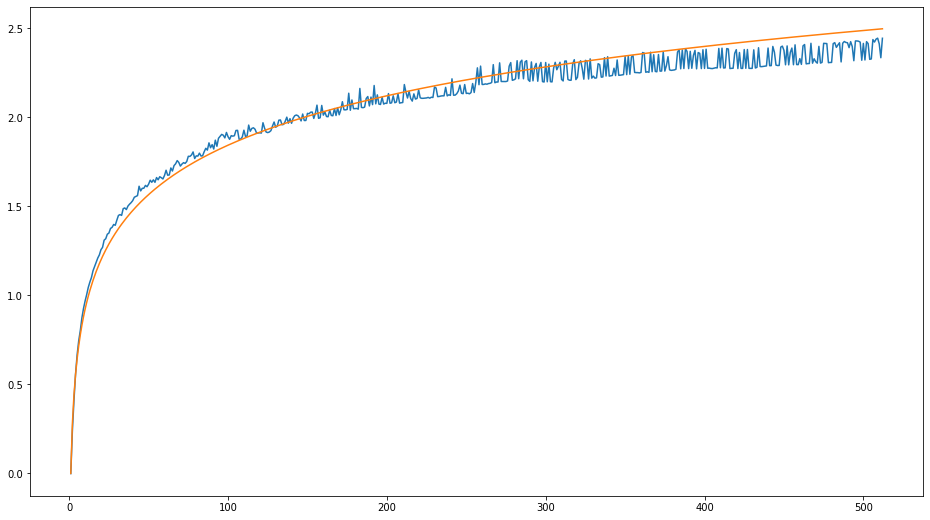

In [51]:
(entropies).plot(figsize=(16, 9))
x = entropies.index
plt.plot(x, np.log(x)*0.4)
plt.savefig("viz/entropy/.png")

In [61]:
survival_function(attentions[50].flatten())

0.000000e+00    1.000000
0.000000e+00    1.000000
0.000000e+00    1.000000
1.401298e-45    0.999999
2.802597e-45    0.999999
                  ...   
1.000000e+00    0.000013
1.000000e+00    0.000013
1.000000e+00    0.000013
1.000000e+00    0.000013
1.000000e+00    0.000013
Length: 3745440, dtype: float64

1 147456
2 220320
5 440640
10 801504
20 1524096
50 3745440
100 7344720
200 11635488
500 36144144


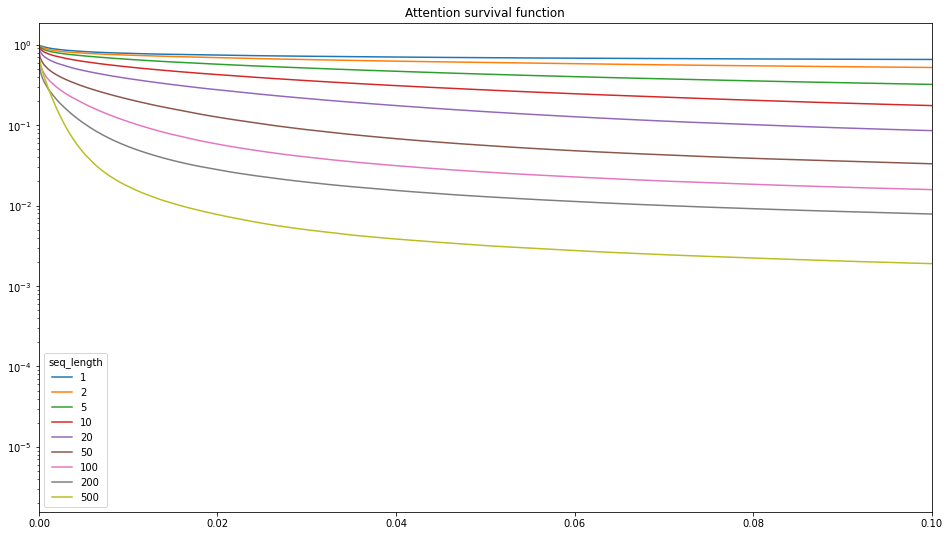

<Figure size 432x288 with 0 Axes>

In [80]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.yscale("log")
for i in [1, 2, 5, 10, 20, 50, 100, 200, 500]:
    print(i, len(attentions[i].flatten()))
    surv = survival_function(attentions[i].flatten()[:10_000_000])
    ax.plot(surv.index, surv, label=i)
ax.set_title("Attention survival function")
plt.legend(title="seq_length")
ax.set_xlim((0, 0.1))
plt.show()
plt.savefig("viz/attention/survival_log_zoomed.png")

# French

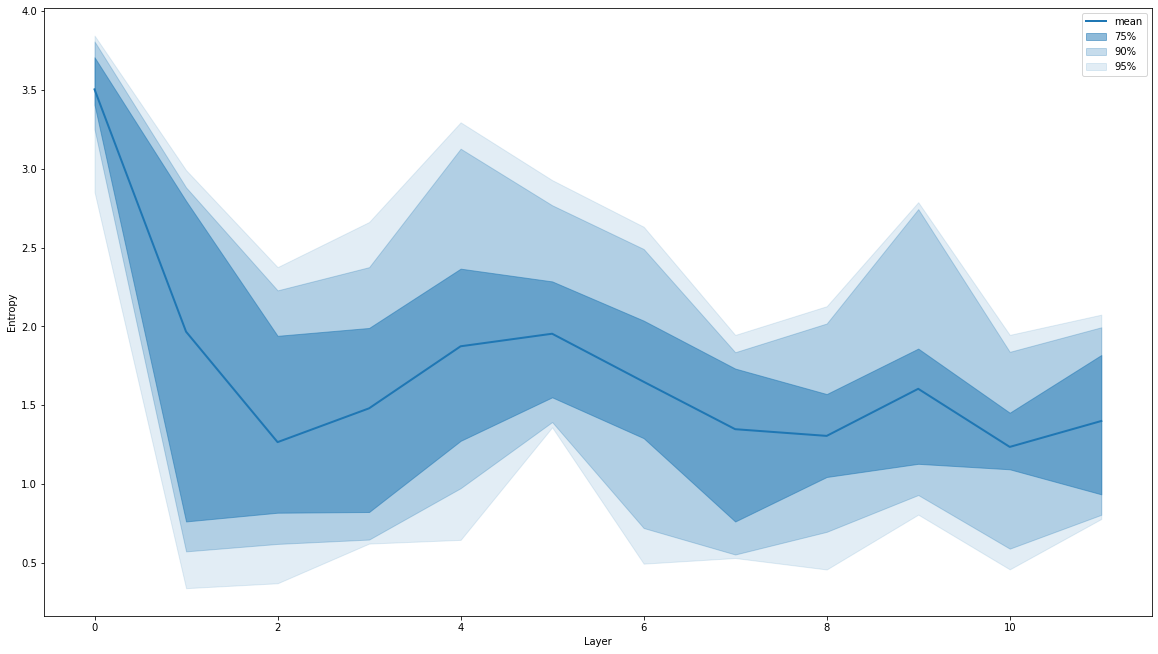

In [14]:
french_att = get_attentions(tokens, model, seq_length=64, batch_size=64, as_array=True, verbose=False)
plot_entropy_distribution_over_layers(french_att)
plt.savefig("../viz/entropy/french.png")

# Scrambled

In [15]:
from random import sample
scrambled = "".join(sample(text, len(text)))
scrambled

'ulneaio n er  pu idsnsdrrembo tiusna\'romndeane l  eeac imsaee  etpsee nrmf meclud aafeenx rn tu angrepuld efuisetnaatm2u mesaceesrsounxnubufolnnar o pavelasrleulpotcrenia7i te ror sete"tt9lulr eere uepaoaesq raa es  mt(.ntanuutb r foe  olaau (n\nnace ei ntiteeoiqae e a0nepo a.ree oaul  l lrdcvrd  lzctg  anp\'almoaes l ununereus \n eayeedudg   ie  sicoe tnsbeie lrcgheeq  oiusneju sinaseteessv n  ef  urad min nssralv  seltieeaeklmnoel  csstti eessjredrnlh\n q bastypteacseiy ido(etenpdd ds eooe)tdr\ntg esadons rez elece urevtlia o  asc seie dc ae  nab udna .ur\nme  rldr ee stoi a n eensuel  lc nnodue q9 oott sdltt\'incn  tn t e dsl d o t pad, dse i\'.\'nrh .is   cl iutnness totnts  sr aanlc e md ulssstis svn o e,sulaenrmeeoma,eoi ertuslnplhmtaxd)ncsvenfsevrts,,r qedoucseer\'eida,pe lmigliii rr\naeeluau   8ta rmr a eteu mseobna prr dxaeaeaerrnnna a vdoturrroepu  s lni rdeu,rusiie0 )1e e  rbion.emsrpt eddsevi seeemelc4  ipmnt cade" 2enooto tb atifussrelievpemraia  pie  9te \'eq pn ilaanue

Token indices sequence length is longer than the specified maximum sequence length for this model (13489 > 512). Running this sequence through the model will result in indexing errors


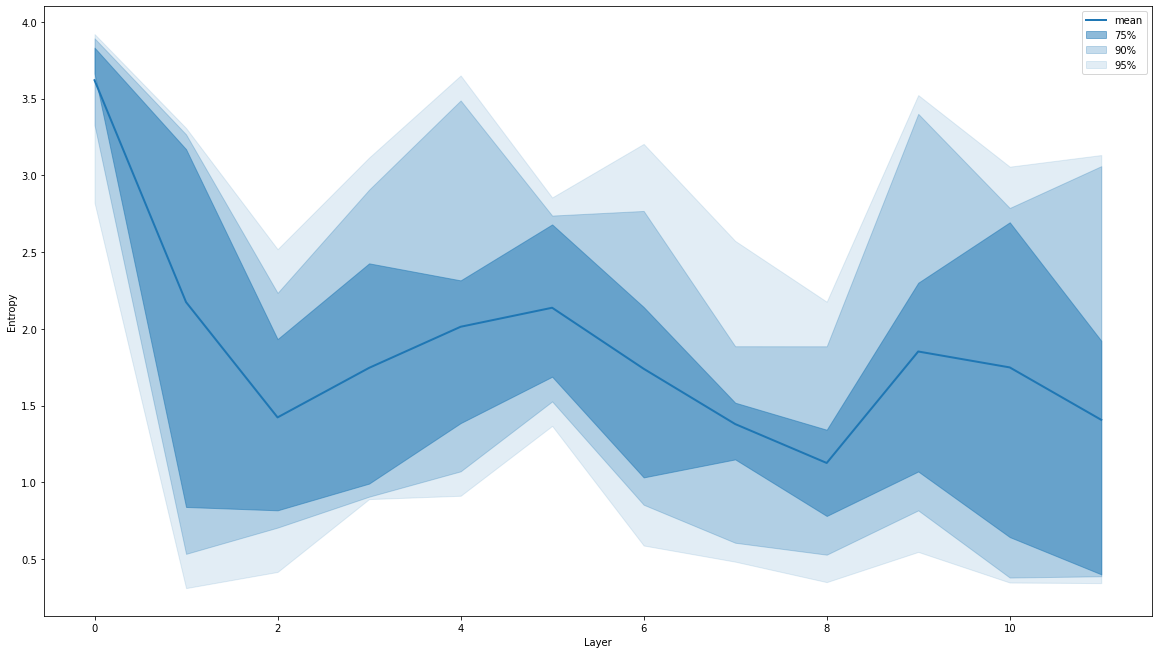

In [16]:
scrambled_att = get_attentions(tokenizer.encode(scrambled), model, seq_length=64, batch_size=64, as_array=True, verbose=False)
plot_entropy_distribution_over_layers(scrambled_att)
plt.savefig("../viz/entropy/scrambled.png")

# English

In [18]:
with open("../data/big.txt", "r") as file:
    english = file.read()

Token indices sequence length is longer than the specified maximum sequence length for this model (25935 > 512). Running this sequence through the model will result in indexing errors


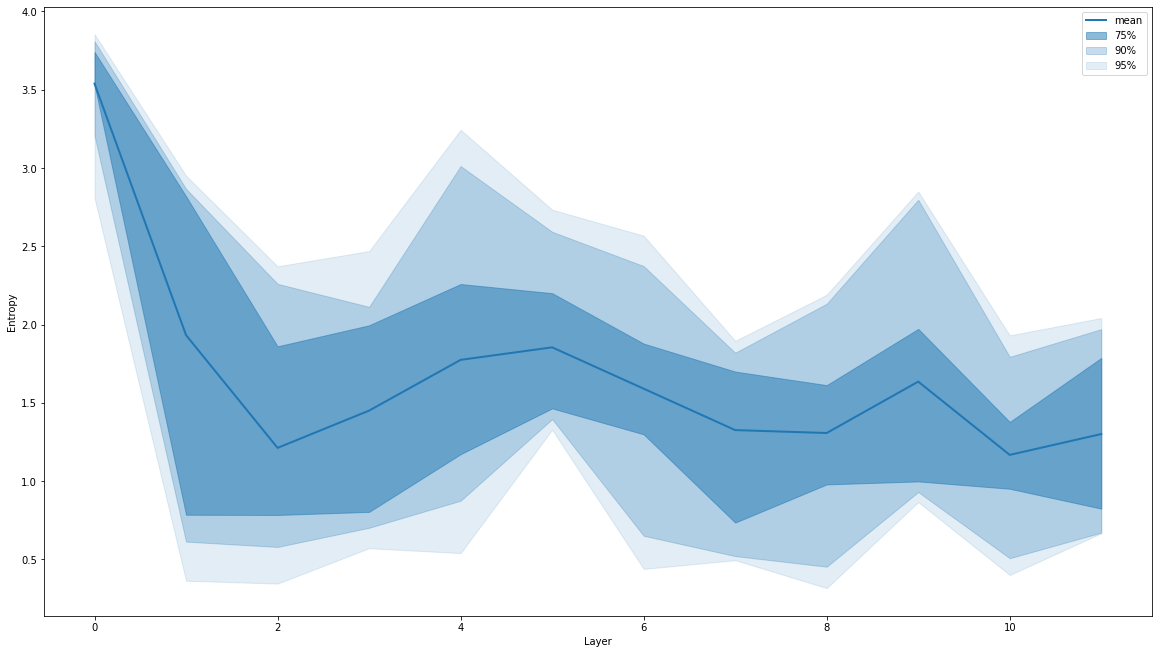

In [19]:
english_att = get_attentions(tokenizer.encode(english[:100000]), model, seq_length=64, batch_size=64, as_array=True, verbose=False)
plot_entropy_distribution_over_layers(english_att)
plt.savefig("../viz/entropy/english.png")

In [20]:
with open("../data/chinese.txt", "r", encoding="utf-8") as file:
    chinese = file.read()

chinese_att = get_attentions(tokenizer.encode(chinese), model, seq_length=64, batch_size=64, as_array=True, verbose=False)

Token indices sequence length is longer than the specified maximum sequence length for this model (1779 > 512). Running this sequence through the model will result in indexing errors


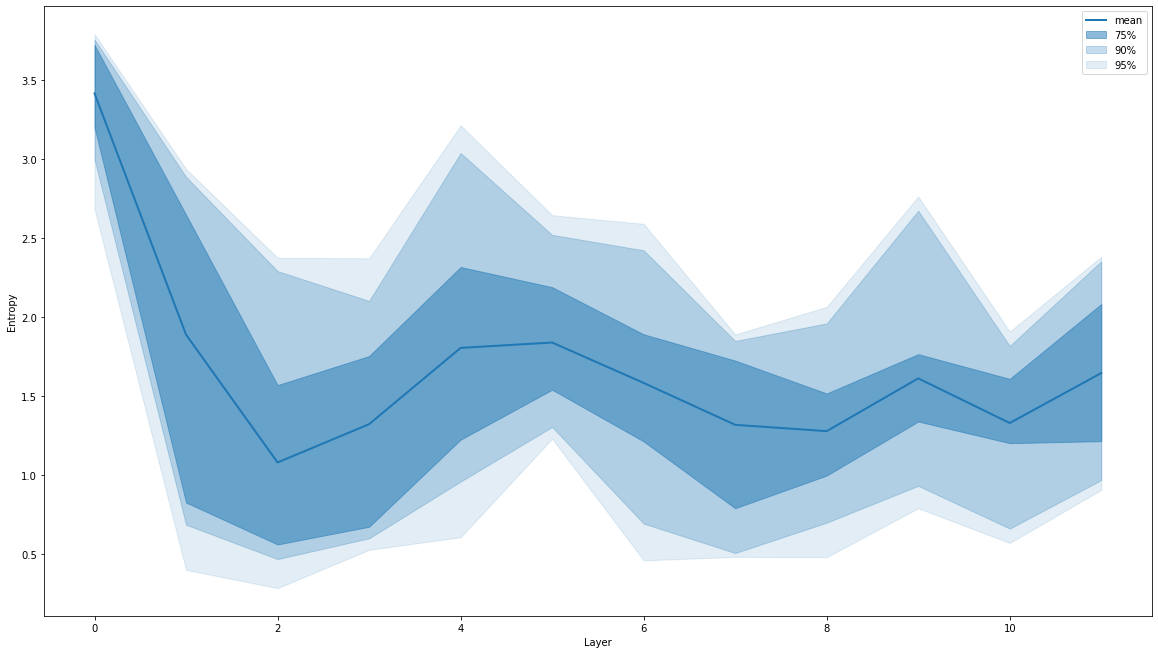

In [21]:
plot_entropy_distribution_over_layers(chinese_att)
plt.savefig("../viz/entropy/chinese.png")